In [ ]:
!pip -q install scikit-learn==1.4.2 joblib==1.4.2 numpy==1.26.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

Saving Telco_Customer_Churn_Dataset.csv to Telco_Customer_Churn_Dataset.csv


In [ ]:
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].astype(str).str.strip().replace("", np.nan), errors="coerce")
print("Shape:", df.shape)

Shape: (7043, 21)


EDA

Tampilkan 5 baris pertama, info(), describe()

In [ ]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
display(df.describe(include="all"))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


Missing value (%) + visualisasi bar

,missing_%
TotalCharges,0.156183
customerID,0.000000
DeviceProtection,0.000000
MonthlyCharges,0.000000
PaymentMethod,0.000000
PaperlessBilling,0.000000
Contract,0.000000
StreamingMovies,0.000000
StreamingTV,0.000000
TechSupport,0.000000


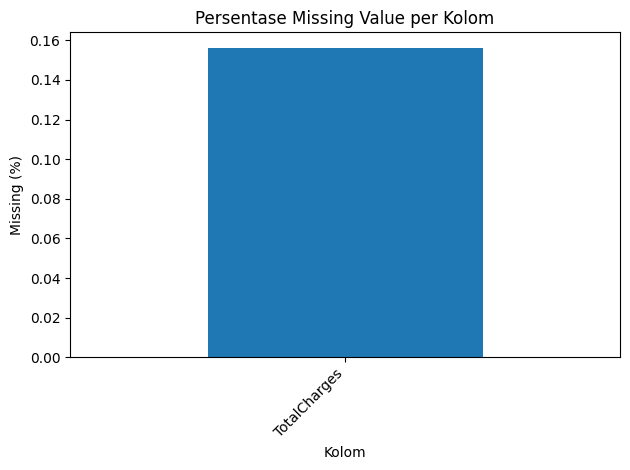

In [ ]:
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
display(missing_pct.to_frame("missing_%"))

plt.figure()
missing_pct[missing_pct > 0].plot(kind="bar")
plt.title("Persentase Missing Value per Kolom")
plt.ylabel("Missing (%)")
plt.xlabel("Kolom")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Noted : Karena TotalCharges DI ubah ke numerik, yang tadinya " " jadi NaN, sehingga missing nya terlihat.

Distribusi target (Churn)

,count
Churn,
No,5174
Yes,1869


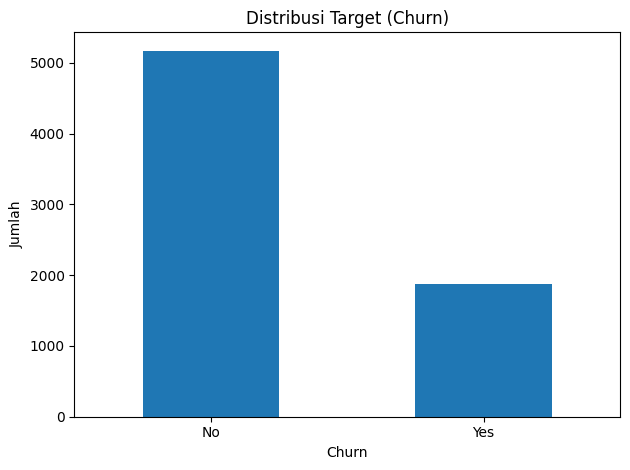

In [ ]:
target_counts = df["Churn"].value_counts()
display(target_counts)

plt.figure()
target_counts.plot(kind="bar")
plt.title("Distribusi Target (Churn)")
plt.ylabel("Jumlah")
plt.xlabel("Churn")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Noted : Ini untuk cek apakah kelas seimbang atau tidak (biasanya churn “Yes” lebih sedikit).

Korelasi fitur numerik + heatmap sederhana

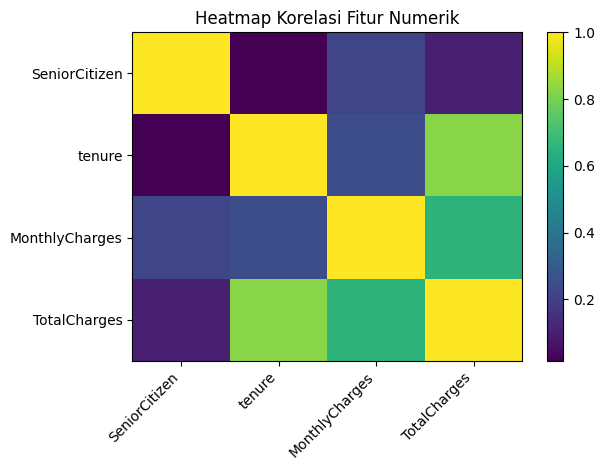

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

plt.figure()
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

display(corr)

Noted : Korelasi membantu melihat hubungan antar variabel numerik yang mungkin relevan dengan churn.

Direct Modeling

In [ ]:
#y: target (ubah Yes/No -> 1/0)
y = (df["Churn"] == "Yes").astype(int)

#X: semua fitur selain target
X = df.drop(columns=["Churn"])

#fitur ID unik biasanya tidak informatif untuk prediksi -> dibuang
X = X.drop(columns=["customerID"])

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # menjaga proporsi churn pada train & test
)

Pilih 3 model: konvensional, bagging, voting

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Preprocess MINIMAL untuk direct modeling:
# - numerik: imputasi median
# - kategorikal: imputasi modus + OneHotEncoding
direct_preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

# (1) Konvensional: Logistic Regression
model_lr = LogisticRegression(max_iter=3000)

# (2) Ensemble Bagging: Random Forest
model_rf = RandomForestClassifier(random_state=42)

# (3) Ensemble Voting: gabungan beberapa model konvensional
model_voting = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=3000)),
        ("svc", SVC(probability=True)),
        ("knn", KNeighborsClassifier())
    ],
    voting="soft"
)

Latih 3 model (direct)

In [ ]:
pipe_lr_direct = Pipeline([("prep", direct_preprocess), ("model", model_lr)])
pipe_rf_direct = Pipeline([("prep", direct_preprocess), ("model", model_rf)])
pipe_vt_direct = Pipeline([("prep", direct_preprocess), ("model", model_voting)])

pipe_lr_direct.fit(X_train, y_train)
pipe_rf_direct.fit(X_train, y_train)
pipe_vt_direct.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=3000)),
                                              ('svc', SVC(probability=True)),
                                              ('knn', KNeighborsClassifier())],
                                  voting='soft'))])

Evaluasi (accuracy, precision, recall, F1, confusion matrix)

=== Direct - Logistic Regression ===
Accuracy : 0.8069552874378992
Precision: 0.660377358490566
Recall   : 0.5614973262032086
F1-score : 0.6069364161849711

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



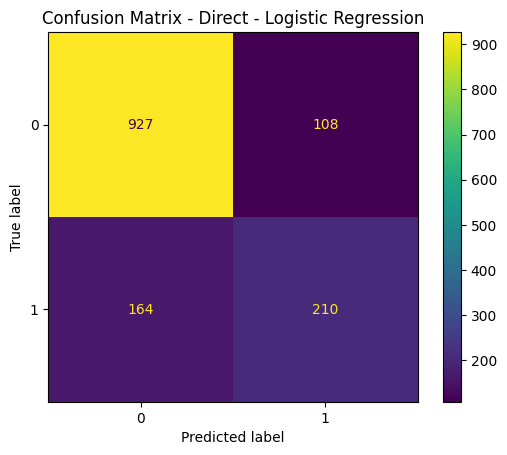

=== Direct - Random Forest ===
Accuracy : 0.7778566359119943
Precision: 0.6033898305084746
Recall   : 0.47593582887700536
F1-score : 0.5321375186846039

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



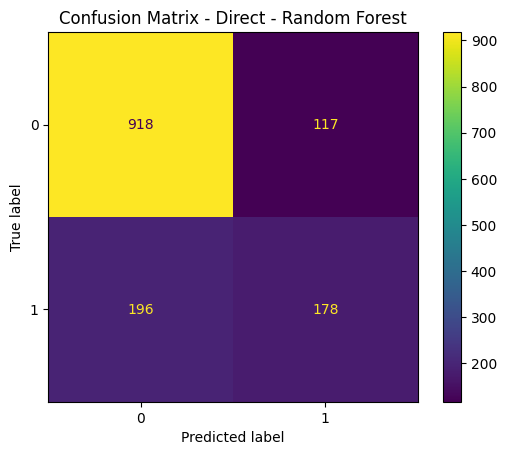

=== Direct - VotingClassifier ===
Accuracy : 0.7991483321504613
Precision: 0.6798418972332015
Recall   : 0.45989304812834225
F1-score : 0.5486443381180224

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



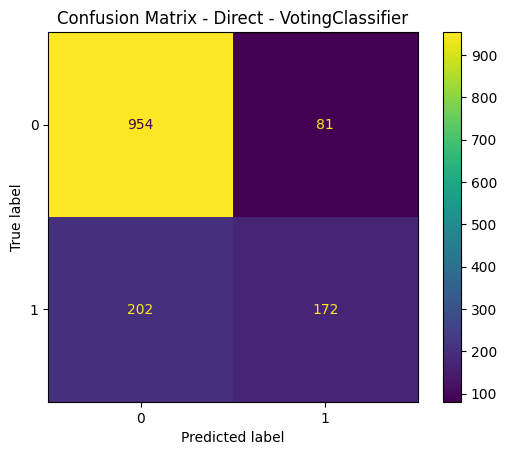

,Model,Accuracy,Precision,Recall,F1
0,Direct - Logistic Regression,0.806955,0.660377,0.561497,0.606936
1,Direct - Random Forest,0.777857,0.603390,0.475936,0.532138
2,Direct - VotingClassifier,0.799148,0.679842,0.459893,0.548644


In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

results_direct = []
results_direct.append(evaluate_model("Direct - Logistic Regression", pipe_lr_direct, X_test, y_test))
results_direct.append(evaluate_model("Direct - Random Forest", pipe_rf_direct, X_test, y_test))
results_direct.append(evaluate_model("Direct - VotingClassifier", pipe_vt_direct, X_test, y_test))

pd.DataFrame(results_direct)

Modeling dengan Preprocessing (tanpa tuning)

missing value, duplikasi, outlier

encoding kategorikal

scaling jika perlu

hapus fitur tidak relevan

In [ ]:
from sklearn.preprocessing import StandardScaler

df_prep = df.copy()

# (1) Drop duplicates (kalau ada)
df_prep = df_prep.drop_duplicates()

# (2) Target
y = (df_prep["Churn"] == "Yes").astype(int)

# (3) Buang kolom tidak relevan
X = df_prep.drop(columns=["Churn", "customerID"])

# (4) Definisikan kolom numerik & kategorikal
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# (5) Split dulu agar outlier boundary & scaler tidak "bocor" ke data test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# (6) Outlier handling (IQR capping) - dihitung dari TRAIN saja
def iqr_cap_train_bounds(X_train_df, cols):
    bounds = {}
    for c in cols:
        q1 = X_train_df[c].quantile(0.25)
        q3 = X_train_df[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        bounds[c] = (low, high)
    return bounds

def apply_iqr_cap(df_in, bounds):
    df_out = df_in.copy()
    for c, (low, high) in bounds.items():
        df_out[c] = df_out[c].clip(low, high)
    return df_out

# imputasi numerik dulu biar quantile aman
X_train_num = X_train[num_cols].copy()
X_test_num  = X_test[num_cols].copy()

# imputasi numerik median (train)
num_median = X_train_num.median()
X_train_num = X_train_num.fillna(num_median)
X_test_num  = X_test_num.fillna(num_median)

bounds = iqr_cap_train_bounds(X_train_num, num_cols)
X_train_num = apply_iqr_cap(X_train_num, bounds)
X_test_num  = apply_iqr_cap(X_test_num, bounds)

# replace balik ke X_train/X_test
X_train = X_train.copy()
X_test  = X_test.copy()
X_train[num_cols] = X_train_num
X_test[num_cols]  = X_test_num

# imputasi kategorikal modus (train)
cat_mode = X_train[cat_cols].mode().iloc[0]
X_train[cat_cols] = X_train[cat_cols].fillna(cat_mode)
X_test[cat_cols]  = X_test[cat_cols].fillna(cat_mode)

# (7) Encoding + Scaling:
# - numerik discale (karena LR, SVC, KNN sensitif skala)
# - kategorikal di-OHE
preprocess_full = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

Noted :
Saya split dulu → hitung batas outlier dari train → terapkan ke train & test (menghindari data leakage).

StandardScaler saya pakai karena model seperti LR/SVC/KNN lebih stabil kalau numerik diskalakan.

Train 3 model (tanpa tuning) + evaluasi

=== Preprocess - Logistic Regression ===
Accuracy : 0.8005677785663591
Precision: 0.6448598130841121
Recall   : 0.553475935828877
F1-score : 0.5956834532374101

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



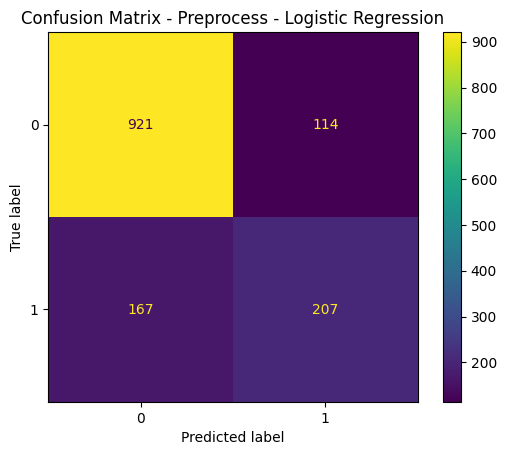

=== Preprocess - Random Forest ===
Accuracy : 0.7792760823278921
Precision: 0.6053511705685619
Recall   : 0.4839572192513369
F1-score : 0.537890044576523

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



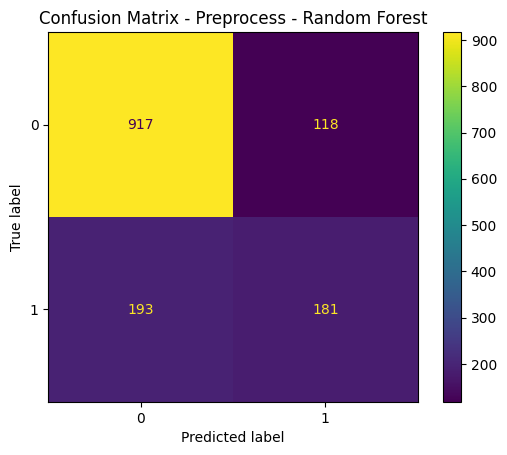

=== Preprocess - VotingClassifier ===
Accuracy : 0.7892122072391767
Precision: 0.6305084745762712
Recall   : 0.49732620320855614
F1-score : 0.5560538116591929

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



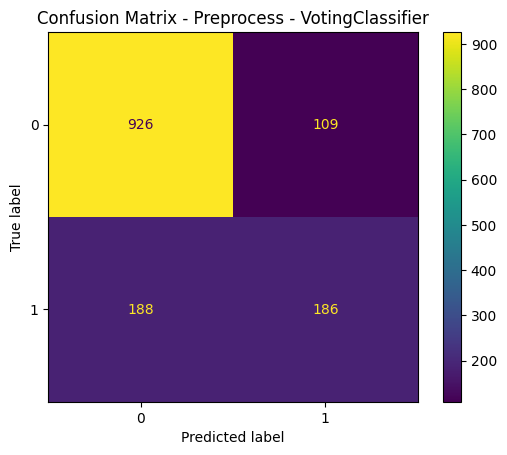

,Model,Accuracy,Precision,Recall,F1
0,Preprocess - Logistic Regression,0.800568,0.644860,0.553476,0.595683
1,Preprocess - Random Forest,0.779276,0.605351,0.483957,0.537890
2,Preprocess - VotingClassifier,0.789212,0.630508,0.497326,0.556054


In [ ]:
# Model sama seperti sebelumnya
model_lr = LogisticRegression(max_iter=3000)
model_rf = RandomForestClassifier(random_state=42)
model_voting = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=3000)),
        ("svc", SVC(probability=True)),
        ("knn", KNeighborsClassifier())
    ],
    voting="soft"
)

pipe_lr_prep = Pipeline([("prep", preprocess_full), ("model", model_lr)])
pipe_rf_prep = Pipeline([("prep", preprocess_full), ("model", model_rf)])
pipe_vt_prep = Pipeline([("prep", preprocess_full), ("model", model_voting)])

pipe_lr_prep.fit(X_train, y_train)
pipe_rf_prep.fit(X_train, y_train)
pipe_vt_prep.fit(X_train, y_train)

results_prep = []
results_prep.append(evaluate_model("Preprocess - Logistic Regression", pipe_lr_prep, X_test, y_test))
results_prep.append(evaluate_model("Preprocess - Random Forest", pipe_rf_prep, X_test, y_test))
results_prep.append(evaluate_model("Preprocess - VotingClassifier", pipe_vt_prep, X_test, y_test))

pd.DataFrame(results_prep)

Hyperparameter Tuning

Susun parameter grid

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Pipeline (pakai preprocess_full agar konsisten)
pipe_lr = Pipeline([("prep", preprocess_full), ("model", LogisticRegression(max_iter=5000))])
pipe_rf = Pipeline([("prep", preprocess_full), ("model", RandomForestClassifier(random_state=42))])
pipe_vt = Pipeline([("prep", preprocess_full), ("model", VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=5000)),
        ("svc", SVC(probability=True)),
        ("knn", KNeighborsClassifier())
    ],
    voting="soft"
))])

# Grid Logistic Regression (konvensional)
param_grid_lr = {
    "model__C": [0.1, 1, 10],
    "model__solver": ["lbfgs"],
}

# Grid Random Forest (bagging)
param_grid_rf = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

# Voting: tuning weights + parameter model di dalam voting
# NOTE: penamaan param harus: model__<namaEstimator>__<param>
param_dist_vt = {
    "model__weights": [(1,1,1), (2,1,1), (1,2,1), (1,1,2)],
    "model__lr__C": [0.1, 1, 10],
    "model__svc__C": [0.5, 1, 5],
    "model__svc__gamma": ["scale", "auto"],
    "model__knn__n_neighbors": [5, 11, 21]
}

Proses tuning + ambil best estimator & best params

In [ ]:
# Logistic Regression (GridSearch)
gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    cv=3,
    scoring="f1",
    n_jobs=-1
)
gs_lr.fit(X_train, y_train)

print("Best LR Params:", gs_lr.best_params_)
best_lr = gs_lr.best_estimator_

# Random Forest (GridSearch)
gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="f1",
    n_jobs=-1
)
gs_rf.fit(X_train, y_train)

print("Best RF Params:", gs_rf.best_params_)
best_rf = gs_rf.best_estimator_

# Voting (RandomizedSearch agar tidak terlalu berat)
rs_vt = RandomizedSearchCV(
    estimator=pipe_vt,
    param_distributions=param_dist_vt,
    n_iter=20,
    cv=3,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)
rs_vt.fit(X_train, y_train)

print("Best Voting Params:", rs_vt.best_params_)
best_vt = rs_vt.best_estimator_

Best LR Params: {'model__C': 10, 'model__solver': 'lbfgs'}
Best RF Params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Voting Params: {'model__weights': (1, 1, 2), 'model__svc__gamma': 'auto', 'model__svc__C': 1, 'model__lr__C': 0.1, 'model__knn__n_neighbors': 21}


Noted : GridSearchCV untuk LR & RF karena grid masih masuk akal.

RandomizedSearchCV untuk Voting karena kombinasi param lebih banyak (lebih hemat waktu).

Evaluasi model optimal (tuned) + total 9 model

=== Tuned - Logistic Regression ===
Accuracy : 0.794180269694819
Precision: 0.63125
Recall   : 0.5401069518716578
F1-score : 0.5821325648414986

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



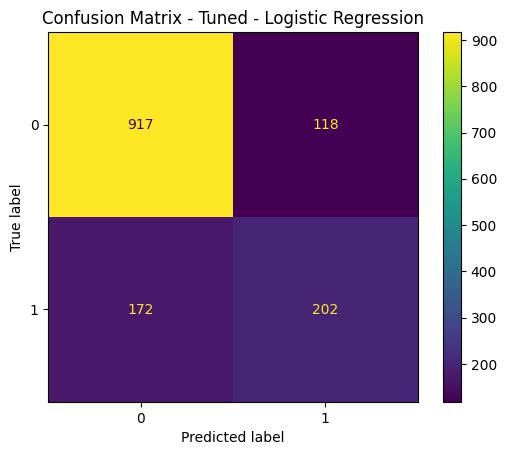

=== Tuned - Random Forest ===
Accuracy : 0.8026969481902059
Precision: 0.6655172413793103
Recall   : 0.516042780748663
F1-score : 0.5813253012048193

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



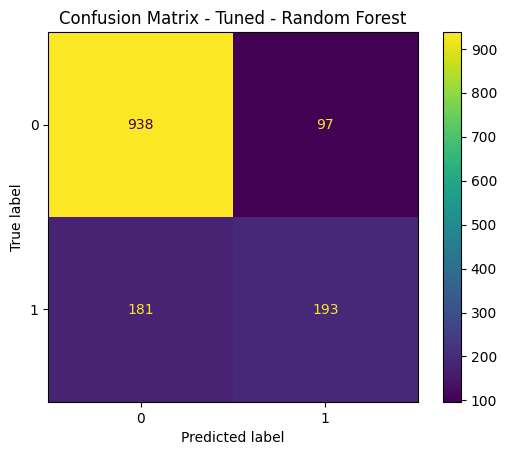

=== Tuned - VotingClassifier ===
Accuracy : 0.7955997161107168
Precision: 0.6414473684210527
Recall   : 0.5213903743315508
F1-score : 0.5752212389380531

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



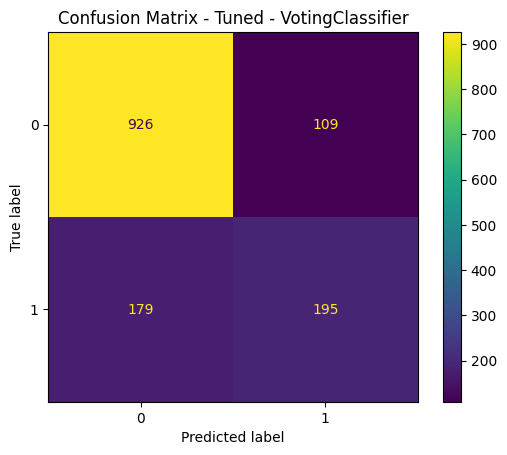

,Model,Accuracy,Precision,Recall,F1
0,Direct - Logistic Regression,0.806955,0.660377,0.561497,0.606936
3,Preprocess - Logistic Regression,0.800568,0.644860,0.553476,0.595683
6,Tuned - Logistic Regression,0.794180,0.631250,0.540107,0.582133
7,Tuned - Random Forest,0.802697,0.665517,0.516043,0.581325
8,Tuned - VotingClassifier,0.795600,0.641447,0.521390,0.575221
5,Preprocess - VotingClassifier,0.789212,0.630508,0.497326,0.556054
2,Direct - VotingClassifier,0.799148,0.679842,0.459893,0.548644
4,Preprocess - Random Forest,0.779276,0.605351,0.483957,0.537890
1,Direct - Random Forest,0.777857,0.603390,0.475936,0.532138


In [ ]:
results_tuned = []
results_tuned.append(evaluate_model("Tuned - Logistic Regression", best_lr, X_test, y_test))
results_tuned.append(evaluate_model("Tuned - Random Forest", best_rf, X_test, y_test))
results_tuned.append(evaluate_model("Tuned - VotingClassifier", best_vt, X_test, y_test))

df_all_results = pd.concat([
    pd.DataFrame(results_direct),
    pd.DataFrame(results_prep),
    pd.DataFrame(results_tuned)
], ignore_index=True)

display(df_all_results.sort_values("F1", ascending=False))

Deployment (Streamlit)
Ambil model terbaik & simpan .joblib

In [ ]:
import joblib

# contoh: pilih berdasarkan F1 tertinggi dari df_all_results (yang sudah dihitung)
best_row = df_all_results.sort_values("F1", ascending=False).iloc[0]
print("Best model:", best_row["Model"], "F1:", best_row["F1"])

# tentukan objek model terbaiknya (sesuaikan dengan hasilmu)
# misal kalau terbaik ternyata best_vt:
best_model = best_vt

joblib.dump(best_model, "best_churn_model.joblib")
print("Saved to best_churn_model.joblib")

Best model: Direct - Logistic Regression F1: 0.6069364161849711
Saved to best_churn_model.joblib


Kode Streamlit (app.py)

In [ ]:
!pip -q install streamlit joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
print("streamlit OK")

streamlit OK


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.title("Telco Churn Prediction")

model = joblib.load("best_churn_model.joblib")

st.write("Upload data atau isi input (contoh sederhana).")

Writing app.py


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.58.57:8501

  Stopping...


In [ ]:
# ====== app.py ======
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="Telco Churn Prediction", layout="centered")
st.title("📉 Prediksi Churn Pelanggan (Telco)")
st.write("Masukkan data pelanggan, lalu klik **Prediksi**.")

YES_NO = ["Yes", "No"]
PAYMENT_METHODS = [
    "Electronic check",
    "Mailed check",
    "Bank transfer (automatic)",
    "Credit card (automatic)"
]
CONTRACTS = ["Month-to-month", "One year", "Two year"]
INTERNET_SERVICES = ["DSL", "Fiber optic", "No"]

@st.cache_resource
def load_model():
    return joblib.load("best_churn_model.joblib")

model = load_model()

def _get_classes(m):
    # model bisa pipeline / estimator biasa
    if hasattr(m, "classes_"):
        return list(m.classes_)
    if hasattr(m, "named_steps"):
        last_step = list(m.named_steps.values())[-1]
        if hasattr(last_step, "classes_"):
            return list(last_step.classes_)
    return None

def _positive_label(classes):
    """
    Tentukan label positif churn (Yes) dengan aman.
    """
    if not classes:
        return None
    # kalau ada label string "Yes", pakai itu
    for lab in classes:
        if str(lab).lower() == "yes":
            return lab
    # kalau ada angka 1, pakai 1
    if 1 in classes:
        return 1
    # fallback: ambil kelas terakhir (umum pada sklearn)
    return classes[-1]

def _is_churn_label(pred_label):
    """
    Deteksi churn dari label prediksi, aman untuk:
    - 'Yes'/'No'
    - 1/0
    """
    s = str(pred_label).strip().lower()
    return (s == "yes") or (s == "1") or (s == "true")

with st.form("churn_form"):
    customer_id = st.text_input(
        "Customer ID (wajib diisi)",
        placeholder="Contoh: 7590-VHVEG"
    )

    col1, col2 = st.columns(2)

    with col1:
        gender = st.selectbox("gender", ["Female", "Male"])
        SeniorCitizen = st.selectbox("SeniorCitizen", [0, 1])
        Partner = st.selectbox("Partner", YES_NO)
        Dependents = st.selectbox("Dependents", YES_NO)
        tenure = st.number_input("tenure (bulan)", min_value=0, max_value=100, value=12)

        PhoneService = st.selectbox("PhoneService", YES_NO)

        # ✅ MultipleLines tergantung PhoneService
        if PhoneService == "No":
            MultipleLines = st.selectbox(
                "MultipleLines",
                ["No phone service"],
                disabled=True
            )
        else:
            MultipleLines = st.selectbox("MultipleLines", ["Yes", "No"])

        InternetService = st.selectbox("InternetService", INTERNET_SERVICES)

        # ✅ Fitur internet tergantung InternetService
        if InternetService == "No":
            OnlineSecurity = st.selectbox("OnlineSecurity", ["No internet service"], disabled=True)
            OnlineBackup = st.selectbox("OnlineBackup", ["No internet service"], disabled=True)
        else:
            OnlineSecurity = st.selectbox("OnlineSecurity", ["Yes", "No"])
            OnlineBackup = st.selectbox("OnlineBackup", ["Yes", "No"])

    with col2:
        # ✅ Fitur internet tergantung InternetService
        if InternetService == "No":
            DeviceProtection = st.selectbox("DeviceProtection", ["No internet service"], disabled=True)
            TechSupport = st.selectbox("TechSupport", ["No internet service"], disabled=True)
            StreamingTV = st.selectbox("StreamingTV", ["No internet service"], disabled=True)
            StreamingMovies = st.selectbox("StreamingMovies", ["No internet service"], disabled=True)
        else:
            DeviceProtection = st.selectbox("DeviceProtection", ["Yes", "No"])
            TechSupport = st.selectbox("TechSupport", ["Yes", "No"])
            StreamingTV = st.selectbox("StreamingTV", ["Yes", "No"])
            StreamingMovies = st.selectbox("StreamingMovies", ["Yes", "No"])

        Contract = st.selectbox("Contract", CONTRACTS)
        PaperlessBilling = st.selectbox("PaperlessBilling", YES_NO)
        PaymentMethod = st.selectbox("PaymentMethod", PAYMENT_METHODS)

        MonthlyCharges = st.number_input("MonthlyCharges", min_value=0.0, max_value=200.0, value=70.0, format="%.2f")
        TotalCharges = st.number_input("TotalCharges", min_value=0.0, max_value=20000.0, value=1000.0, format="%.2f")

    submitted = st.form_submit_button("Prediksi")

if submitted:
    if customer_id.strip() == "":
        st.error("Customer ID wajib diisi!")
        st.stop()

    input_df = pd.DataFrame([{
        "gender": gender,
        "SeniorCitizen": SeniorCitizen,
        "Partner": Partner,
        "Dependents": Dependents,
        "tenure": tenure,
        "PhoneService": PhoneService,
        "MultipleLines": MultipleLines,
        "InternetService": InternetService,
        "OnlineSecurity": OnlineSecurity,
        "OnlineBackup": OnlineBackup,
        "DeviceProtection": DeviceProtection,
        "TechSupport": TechSupport,
        "StreamingTV": StreamingTV,
        "StreamingMovies": StreamingMovies,
        "Contract": Contract,
        "PaperlessBilling": PaperlessBilling,
        "PaymentMethod": PaymentMethod,
        "MonthlyCharges": MonthlyCharges,
        "TotalCharges": TotalCharges
    }])

    st.caption(f"Customer ID: **{customer_id.strip()}**")

    # ✅ Tampilkan ringkasan input (biar output sesuai input yang masuk ke model)
    st.subheader("Ringkasan input")
    st.dataframe(input_df, use_container_width=True)

    # ===== Prediksi =====
    pred_label = model.predict(input_df)[0]

    classes = _get_classes(model)
    pos_lab = _positive_label(classes)

    churn_proba = None
    if hasattr(model, "predict_proba") and classes is not None and pos_lab is not None:
        proba_all = model.predict_proba(input_df)[0]
        pos_idx = list(classes).index(pos_lab)
        churn_proba = float(proba_all[pos_idx])

    # ✅ Output label aman (Yes/No atau 1/0)
    if _is_churn_label(pred_label):
        st.error("⚠️ Prediksi: **CHURN (Yes)**")
    else:
        st.success("✅ Prediksi: **TIDAK CHURN (No)**")

    if churn_proba is not None:
        st.write(f"Probabilitas churn (Yes): **{churn_proba:.2f}**")


2026-01-06 15:35:50.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 15:35:50.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import os
print("Current dir:", os.getcwd())
print(os.listdir("."))   # daftar file di folder sekarang

Current dir: /content
['.config', 'best_churn_model.joblib', 'app.py', 'Telco_Customer_Churn_Dataset.csv', 'sample_data']


In [ ]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -lah

total 3.9M
drwxr-xr-x 1 root root 4.0K Dec 23 09:08 .
drwxr-xr-x 1 root root 4.0K Dec 23 08:12 ..
-rw-r--r-- 1 root root  201 Dec 23 09:08 app.py
-rw-r--r-- 1 root root 3.0M Dec 23 09:06 best_churn_model.joblib
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data
-rw-r--r-- 1 root root 955K Dec 23 08:16 Telco_Customer_Churn_Dataset.csv


In [ ]:
from google.colab import files
files.download("best_churn_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>